## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

df_raw = pd.read_excel('Этап 1. Подготовка данных.xlsx', 'Result')
df = df_raw[df_raw['Client ID'].notnull()]
df

,Client ID,Domain,City,Region,Browser,Device Category,_Date,Date,Pageviews,Campaign,...,Город,Просчет стоимости модели,Приход к диллеру,Продажа,Валюта,Курс,Цена(руб),Маржа(руб),Unnamed: 37,Unnamed: 38
0,GA1.2.1000037439.1576672694,BMW-keyauto-krd.ru,Yalta,Crimea,YaBrowser,desktop,17 января 2020 г.,2020-01-17,2,(not set),...,Yalta,NaN,0.0,NaN,NaN,1.0,0.0,0.0,True,True
1,GA1.2.1000100466.1580498751,Mersedes-krasnodar.ru,Simferopol,Crimea,Chrome,mobile,31 января 2020 г.,2020-01-31,14,(not set),...,Simferopol,NaN,NaN,NaN,NaN,1.0,0.0,0.0,True,True
2,GA1.2.1000144581.1577322293,BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,1 января 2020 г.,2020-01-01,4,krasnodar-BMW-tsentr-krasnodar-Q4-network-2019,...,Krasnodar,NaN,NaN,NaN,NaN,1.0,0.0,0.0,True,True
3,GA1.2.1000154585.1581097166,Mersedes-krasnodar.ru,Armavir,Krasnodar Krai,YaBrowser,mobile,7 февраля 2020 г.,2020-02-07,8,(not set),...,Armavir,NaN,0.0,NaN,NaN,1.0,0.0,0.0,True,True
4,GA1.2.1000156589.1580366503,Mersedes-krasnodar.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,30 января 2020 г.,2020-01-30,6,(not set),...,Krasnodar,0.0,1.0,NaN,NaN,1.0,0.0,0.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66157,GA1.2.999548751.1578482710,Mersedes-krasnodar.ru,Rostov-on-Don,Rostov Oblast,Chrome,mobile,8 января 2020 г.,2020-01-08,6,(not set),...,Rostov-on-Don,NaN,0.0,NaN,NaN,1.0,0.0,0.0,True,True
66158,GA1.2.999713054.1578007070,BMW-keyauto-krd.ru,Nalchik,Kabardino-Balkaria,Chrome,desktop,3 января 2020 г.,2020-01-03,2,(not set),...,Nalchik,NaN,NaN,NaN,NaN,1.0,0.0,0.0,True,True
66159,GA1.2.999906876.1578680227,BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,desktop,10 января 2020 г.,2020-01-10,2,(not set),...,Krasnodar,NaN,NaN,NaN,NaN,1.0,0.0,0.0,True,True
66160,GA1.2.999906876.1578680227,BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,desktop,10 января 2020 г.,2020-01-10,2,(not set),...,Krasnodar,1.0,1.0,0,NaN,1.0,0.0,0.0,True,True


## Анализ

### Из каких регионов больше всего заявок

In [2]:
df[df['Просчет стоимости модели']==1]['Region'].value_counts(normalize = True) * 100

Region
Krasnodar Krai          71.971984
Stavropol Krai           4.745804
Rostov Oblast            3.598599
Moscow                   3.139717
Crimea                   2.125347
                          ...    
South Sulawesi           0.012076
Center District          0.012076
Lower Saxony             0.012076
Blagoevgrad Province     0.012076
Magadan Oblast           0.012076
Name: proportion, Length: 137, dtype: float64

Из Краснодарского и Ставропольского края

### Какой средний процент отказов (Bounce)

In [3]:
str(df['Bounce Rate'].agg("mean")*100) + ' %'

'0.22641395362897132 %'

In [4]:
f"{len(df[df['Pageviews']==1])/len(df.index)} %"

'0.0010882379613675523 %'

Тут не совсем понятно, что имелось в виду... поэтому 2 ответа

### С каких устройств чаще заходят на сайты

In [5]:
df['Device Category'].value_counts(normalize = True) * 100

Device Category
mobile     59.649043
desktop    37.226807
tablet      3.124150
Name: proportion, dtype: float64

С мобильных телефонов

### Какие источники наиболее конвертируемые

In [6]:
df.groupby('Source')['Конверсия'].mean().sort_values(ascending=False)

Source
(direct)       0.508331
google         0.503142
yandex         0.495864
BMW-keyauto    0.495622
(others)       0.492978
IG             0.486875
mail.ru        0.477086
Name: Конверсия, dtype: float64

Наибольший процент конверсии при входе по прямой ссылке, далее - гугл. Значительных отличий не наблюдается.

### Рассчитайте ROMI
(при расчете придумайте методологию расчета средней стоимость проданного автомобиля)

В исходных данных нет информации о затратах на маркетинг. Рассчитать показатель невозможно.
По средней стоимости проданного автомобиля - тоже не ясно. В исходных данных недостаточно информации для определения марки автомобиля, а цены сильно отличаются.

In [7]:
margin = df['Маржа(руб)'].sum()
marketing_costs = df['Goal Value'].sum() - margin # в порядке бреда - вдруг это затраты...
f'{(margin - marketing_costs)/marketing_costs *100} %'

'209.71271276817478 %'

### Посчитайте выручку в рублях только по долларовым позициям

In [8]:
df[df['Валюта']=='RUB']['Цена(руб)'].sum()

1834150000.0

### Определите, какой источник трафика наиболее выгоден для компании по текущим данным

In [9]:
df.groupby('Source')['Маржа(руб)'].sum().sort_values(ascending=False)

Source
yandex         3.059756e+08
google         1.662476e+08
(direct)       1.148581e+08
(others)       3.451750e+07
BMW-keyauto    3.243219e+07
IG             7.276500e+06
mail.ru        6.600000e+05
Name: Маржа(руб), dtype: float64

Не совсем понятно, что значит "выгоден", если нет его стоимости...

### Ответьте на вопрос: каких показателей не хватает, чтобы посчитать чистую прибыль?

Да вообще ничего не хватает. Выручка - не полная из-за отсутствия в данных CRM информации о марке и модели.
Если вдруг Goal value - это коммерческие затраты, или % маржи их учитывает, то не хватает АУР (ЗП персонала, аренды/амортизации, прочих затрат на обслуживание) 

### Сделать прогноз до конца февраля по количеству конверсий на каждый день

Для построения прогноза попробуем установить тренд по дням.

In [10]:
from datetime import datetime, timedelta
min_date = df['Date'].min().date() - timedelta(days=1)
pd.options.mode.chained_assignment = None
df['Day'] = df['Date'].apply(lambda date: (date.date() - min_date).days)
df['WeekDay'] = df['Date'].apply(lambda date: date.isoweekday())

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

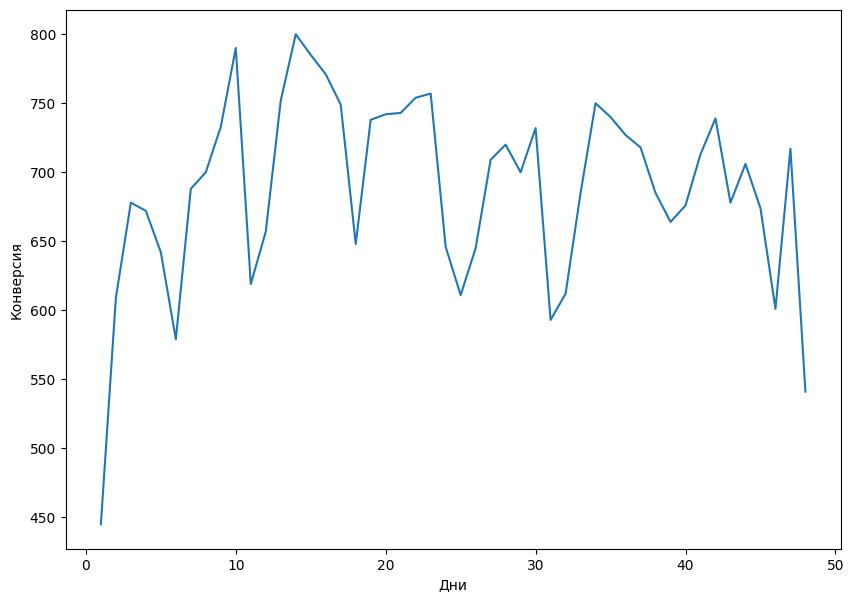

In [12]:
df_conv = df.groupby('Day')['Конверсия'].sum().reset_index()

plt.figure(figsize = (10,7))
plt.plot(df_conv['Day'], df_conv['Конверсия'])
plt.xlabel('Дни')
plt.ylabel('Конверсия')
plt.show()

Видим, что понятного тренда не наблюдается, попробуем детализировать по маркам машин. Также видна недельная периодичность.

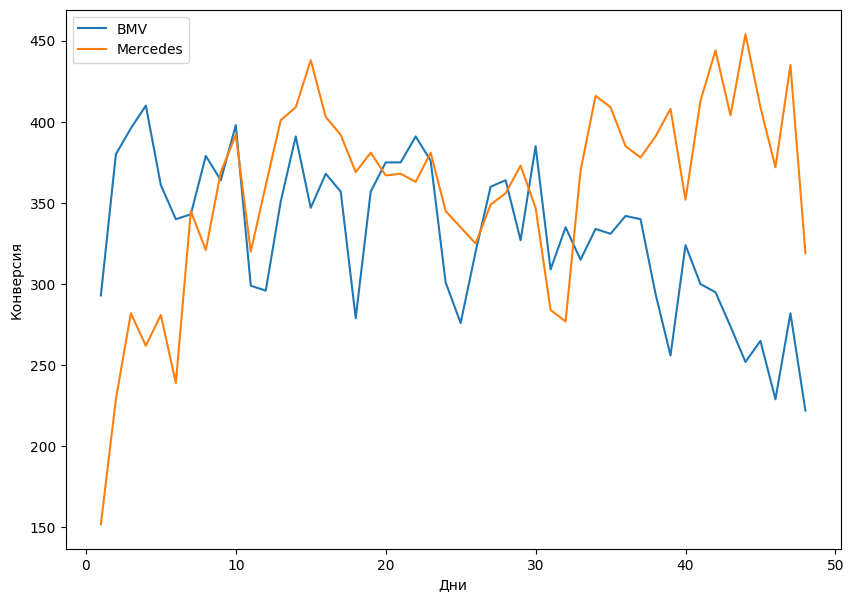

In [13]:
dBMW_trend = df[df['Марка']=='BMW'].groupby('Day')['Конверсия'].sum().reset_index().sort_values(by = 'Day')
dMers_trend = df[df['Марка']=='Mercedes'].groupby('Day')['Конверсия'].sum().reset_index().sort_values(by = 'Day')

plt.figure(figsize = (10,7))

plt.plot(dBMW_trend['Day'], dBMW_trend['Конверсия'])
plt.plot(dMers_trend['Day'], dMers_trend['Конверсия'])

plt.xlabel('Дни')
plt.ylabel('Конверсия')
plt.legend(['BMV','Mercedes'])

plt.show()

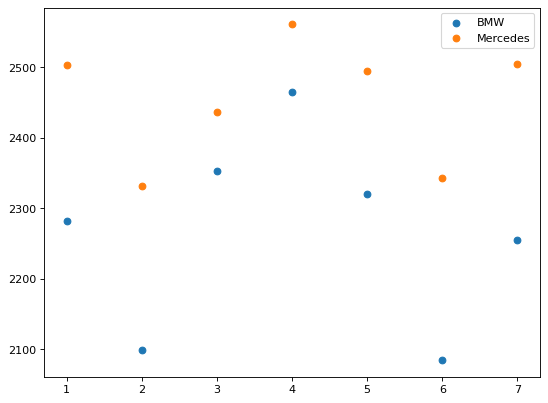

In [14]:
dBMW_wd_profile = df[df['Марка']=='BMW'].groupby('WeekDay')['Конверсия'].sum().reset_index().sort_values(by = 'WeekDay')
dMers_wd_profile = df[df['Марка']=='Mercedes'].groupby('WeekDay')['Конверсия'].sum().reset_index().sort_values(by = 'WeekDay')

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dBMW_wd_profile['WeekDay'], dBMW_wd_profile['Конверсия'], label="BMW" )
plt.scatter(dMers_wd_profile['WeekDay'], dMers_wd_profile['Конверсия'], label="Mercedes" )
plt.legend()
plt.show()

В разрезе марок видны разнонаправленные тренды. Зависимость от дня недели очевидна, от марки зависит слабо.

In [15]:
dBMW_w = [int(dBMW_wd_profile[dBMW_wd_profile['WeekDay']==day]['Конверсия'].iloc[0]) for day in range(1,8)]
print(dBMW_w)
dBMW_w_total = sum(dBMW_w)
dBMW_w = [dBMW_w [i] / dBMW_w_total for i in range(len(dBMW_w))]
print(dBMW_w)

[2282, 2099, 2353, 2465, 2320, 2084, 2255]
[0.14390213141631983, 0.1323622146550637, 0.14837936688106948, 0.15544204817757598, 0.1462983982847774, 0.13141631983856727, 0.1421995207466263]


BMW_err =array([-0.18777083,  0.02840643]), 
Mers_err =array([0.15009929, 0.10271587])


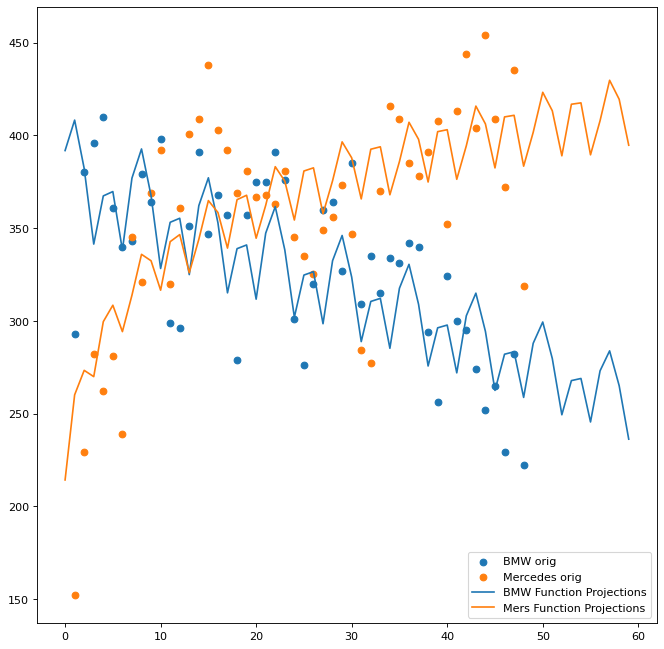

In [16]:
# Рассчитаем недельные профили в виде нормализованных массивов
dBMW_w = [int(dBMW_wd_profile[dBMW_wd_profile['WeekDay']==day]['Конверсия'].iloc[0]) for day in range(1,8)]
dBMW_w_total = sum(dBMW_w)
dBMW_w = [dBMW_w [i] / dBMW_w_total for i in range(len(dBMW_w))]

dMers_w = [int(dMers_wd_profile[dMers_wd_profile['WeekDay']==day]['Конверсия'].iloc[0]) for day in range(1,8)]
dMers_w_total = sum(dMers_w)
dMers_w = [dMers_w [i] / dMers_w_total for i in range(len(dMers_w))]

# задаем аппроксимирующую функцию
def BMW_func( days, a, b ):
    # 1 день в выборке - среда
    prof = np.asarray([dBMW_w[(i + 2) % 7 - 1] for i in days])
    return (a * days + b) * prof
#     return (- a * np.exp( b * days ) + c ) * prof

def Mers_func( days, a, b ):
    # 1 день в выборке - среда
    prof = np.asarray([dMers_w[(i + 2) % 7 - 1] for i in days])
    return (a * np.log(days) + b) * prof


# подбираем оптимальные параметры функций
from scipy.optimize import curve_fit
BMW_popt, BMW_pcov = curve_fit(BMW_func, dBMW_trend['Day'], dBMW_trend['Конверсия'])
Mers_popt, Mers_pcov = curve_fit(Mers_func, dMers_trend['Day'], dMers_trend['Конверсия'])
BMW_err = np.sqrt(np.diag(BMW_pcov))/BMW_popt
Mers_err = np.sqrt(np.diag(Mers_pcov))/Mers_popt
print(f'{BMW_err =}, \n{Mers_err =}')

# задаем точку прогноза - конец февраля
projection_endpoint = 60

# задаем значения функции x с помощью метода np.arange и параметры подобранной кривой
BMW_y_projected = BMW_func( np.arange( 1, projection_endpoint + 1 ), *BMW_popt )
Mers_y_projected = Mers_func( np.arange( 1, projection_endpoint + 1 ), *Mers_popt )

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(dBMW_trend['Day'], dBMW_trend['Конверсия'], label="BMW orig" )
plt.scatter(dMers_trend['Day'], dMers_trend['Конверсия'], label="Mercedes orig" )
plt.plot( BMW_y_projected, label="BMW Function Projections" )
plt.plot( Mers_y_projected, label="Mers Function Projections" )
plt.legend()
plt.show()


In [17]:
res = {(min_date + timedelta(days=i)).isoformat(): round(BMW_y_projected[i] + Mers_y_projected[i]) for i in range(48, 60)}
print(f'{sum(res.values())}, по дням: {res}')

8100, по дням: {'2020-02-17': 642, '2020-02-18': 689, '2020-02-19': 723, '2020-02-20': 693, '2020-02-21': 638, '2020-02-22': 685, '2020-02-23': 686, '2020-02-24': 635, '2020-02-25': 681, '2020-02-26': 713, '2020-02-27': 684, '2020-02-28': 631}


### Какая будет выручка за первый квартал
если средняя стоимость авто останется неизменной, а продажи будут пропорциональны текущим данным

In [18]:
# среднюю стоимость авто считаем только по позициям с определенной маркой
avg_price = df[df['Цена(руб)'] > 0]['Цена(руб)'].mean()
print(f'Средняя стоимость: {avg_price}')

Средняя стоимость: 4143782.0791686983


In [19]:
sales_cnt = df[df['Продажа'] == 1]['Продажа'].sum()
print(f'Текущие продажи: {sales_cnt}')

Текущие продажи: 4086


In [20]:
res = sales_cnt * avg_price * (datetime(2020, 3, 31) - datetime(2019, 12, 31)).days / (datetime(2020, 2, 17) - datetime(2019, 12, 31)).days
print('Выручка {:,.2f}'.format(res))

Выручка 32,099,289,903.52
